# Importing Modules

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("darkgrid")

In [79]:
import sys
# This allows us to import the nucml utilities
sys.path.append("../../..")

In [81]:
import nucml.exfor.data_utilities as exfor_utils
import nucml.exfor.plotting_utilities as exfor_plot
import nucml.endf.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
importlib.reload(exfor_utils)
importlib.reload(exfor_plot)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
print("Finish importing scripts.")

Finish importing scripts.


In [105]:
sns.set(font_scale=1.3)
sns.set_style("white")

In [136]:
figure_dir = "Figures/"

# Loading EXFOR data

In [82]:
# df = nuc_data.load_exfor(basic=True)
df, x_train, x_test, y_train, y_test, to_scale, scaler = nuc_data.load_exfor(
    log=True, low_en=True, num=True, filters=True)

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: True
INFO:root: LOG: True
INFO:root: BASIC: -1
INFO:root: SCALER: STD
INFO:root:Reading data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\EXFOR\CSV_Files\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4184115, 98)
INFO:root:Dropping unnecessary features and one-hot encoding categorical columns...
INFO:root:Splitting dataset into training and testing...
INFO:root:Normalizing dataset...
INFO:root:Fitting new scaler.


# Loading Chlorine Data

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (215, 133)


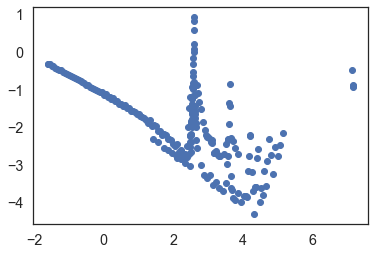

In [106]:
# chlorine_35 = exfor_utils.load_exfor_samples(df, 17, 35, "103", one_hot=False)
chlorine_35 = exfor_utils.load_samples(df, 17, 35, "MT_103", one_hot=True)

plt.scatter(chlorine_35.Energy, chlorine_35.Data)

# Fitting a Linear Model

In [117]:
from sklearn.linear_model import LinearRegression

reg_log_cl = LinearRegression().fit(chlorine_35.Energy.values.reshape(-1, 1), 
                             chlorine_35.Data.values.reshape(-1, 1))

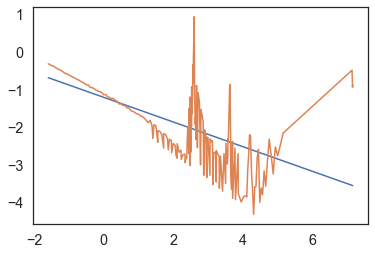

In [118]:
plt.plot(chlorine_35.Energy, reg_log_cl.predict(chlorine_35.Energy.values.reshape(-1, 1)))
plt.plot(chlorine_35.Energy, chlorine_35.Data)

In [119]:
reg_cl = LinearRegression().fit(10**chlorine_35.Energy.values.reshape(-1, 1), 
                             10**chlorine_35.Data.values.reshape(-1, 1))

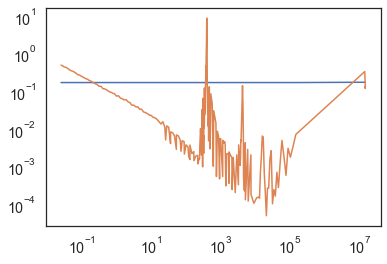

In [120]:
plt.loglog(10**chlorine_35.Energy.values.reshape(-1, 1), reg_cl.predict(10**chlorine_35.Energy.values.reshape(-1, 1)))
plt.loglog(10**chlorine_35.Energy.values.reshape(-1, 1), 10**chlorine_35.Data.values)

# Loading Uranium Fission Data

In [121]:
uranium_fission = exfor_utils.load_samples(df, 92, 233, "MT_18", one_hot=True)

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (94567, 133)


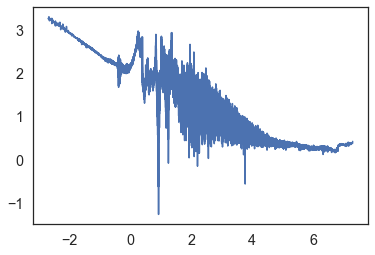

In [122]:
# plt.plot(uranium_fission.Energy, np.log10(uranium_fission.Data))
plt.plot(uranium_fission.Energy, uranium_fission.Data)

# Fitting a Linear Model

In [123]:
reg_log = LinearRegression().fit(uranium_fission.Energy.values.reshape(-1, 1), 
                             uranium_fission.Data.values.reshape(-1, 1))

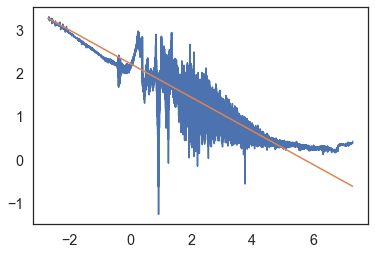

In [124]:
plt.plot(uranium_fission.Energy, uranium_fission.Data)
plt.plot(uranium_fission.Energy, reg_log.predict(uranium_fission.Energy.values.reshape(-1, 1)))


In [125]:
reg = LinearRegression().fit(10**uranium_fission.Energy.values.reshape(-1, 1), 
                             10**uranium_fission.Data.values.reshape(-1, 1))

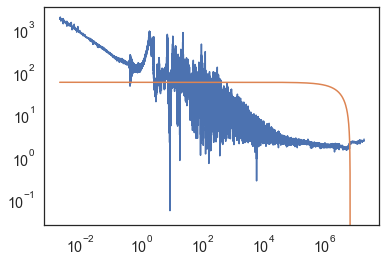

In [126]:
plt.loglog(10**uranium_fission.Energy.values.reshape(-1, 1), 10**uranium_fission.Data.values)
plt.loglog(10**uranium_fission.Energy.values.reshape(-1, 1), reg.predict(10**uranium_fission.Energy.values.reshape(-1, 1)))

# Creating  Plot for Thesis

In [138]:
import os

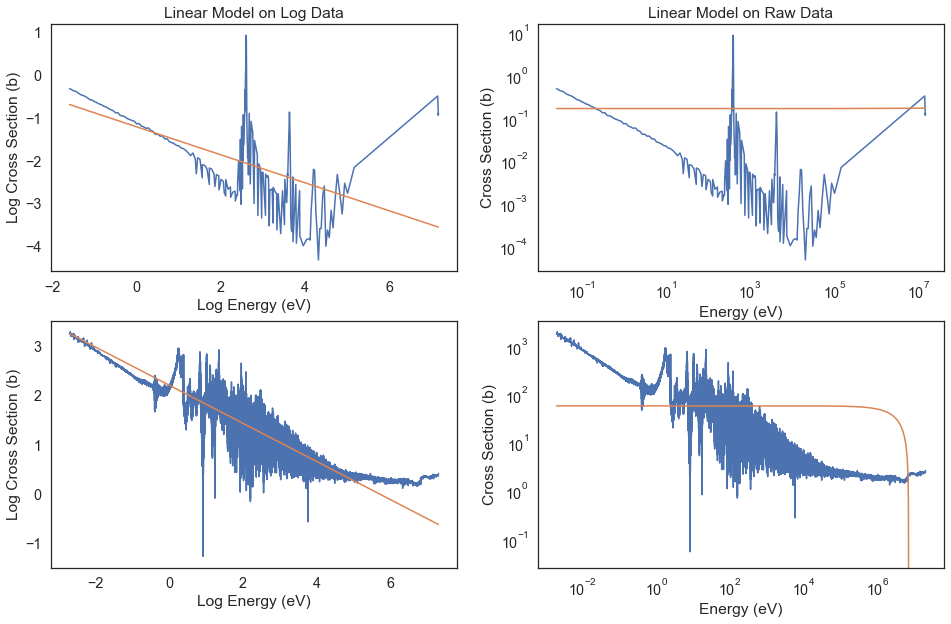

In [139]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(chlorine_35.Energy, chlorine_35.Data)
axs[0, 0].plot(chlorine_35.Energy, reg_log_cl.predict(chlorine_35.Energy.values.reshape(-1, 1)))

axs[0, 1].loglog(10**chlorine_35.Energy.values.reshape(-1, 1), 10**chlorine_35.Data.values)
axs[0, 1].loglog(10**chlorine_35.Energy.values.reshape(-1, 1), reg_cl.predict(10**chlorine_35.Energy.values.reshape(-1, 1)))


axs[1, 0].plot(uranium_fission.Energy, uranium_fission.Data)
axs[1, 0].plot(uranium_fission.Energy, reg_log.predict(uranium_fission.Energy.values.reshape(-1, 1)))

axs[1, 1].loglog(10**uranium_fission.Energy.values.reshape(-1, 1), 10**uranium_fission.Data.values)
axs[1, 1].loglog(10**uranium_fission.Energy.values.reshape(-1, 1), reg.predict(10**uranium_fission.Energy.values.reshape(-1, 1)))


axs[0, 0].set_title('Linear Model on Log Data')
axs[0, 1].set_title('Linear Model on Raw Data')

for ax in axs.flat:
    ax.set(xlabel='Energy (eV)', ylabel='Cross Section (b)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

axs[0, 0].set(ylabel='Log Cross Section (b)')
axs[1, 0].set(ylabel='Log Cross Section (b)')

axs[0, 0].set(xlabel='Log Energy (eV)')
axs[1, 0].set(xlabel='Log Energy (eV)')

plt.savefig(os.path.join(figure_dir, "linear_log_raw_fit.png"), bbox_inches='tight', dpi=600)